In [2]:
# Import pyplot
import matplotlib.pyplot as plt

In [1]:
# Monthly average precipitation
boulder_monthly_precip = [0.70, 0.75, 1.85, 2.93, 3.05, 2.02, 
                          1.93, 1.62, 1.84, 1.31, 1.39, 0.84]

# Month names for plotting
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", 
          "Aug", "Sept", "Oct", "Nov", "Dec"]

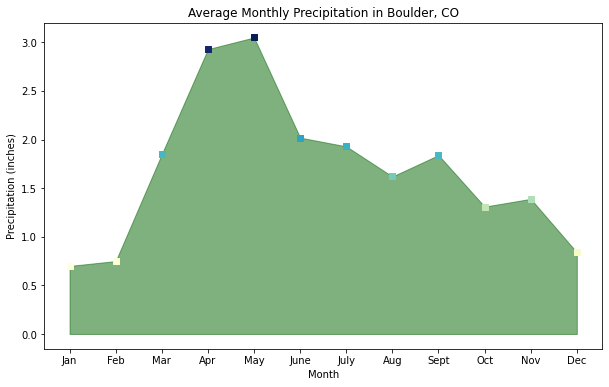

In [30]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.fill_between(months, 
                boulder_monthly_precip, 
                color = "darkgreen",
                alpha = 0.5)

# Add a scatter with symbols
ax.scatter(months, 
           boulder_monthly_precip, 
           c = boulder_monthly_precip,
           cmap = "YlGnBu",
           marker = ",")

# Set plot title and axes labels
ax.set(title = "Average Monthly Precipitation in Boulder, CO",
       xlabel = "Month",
       ylabel = "Precipitation (inches)")

plt.show()

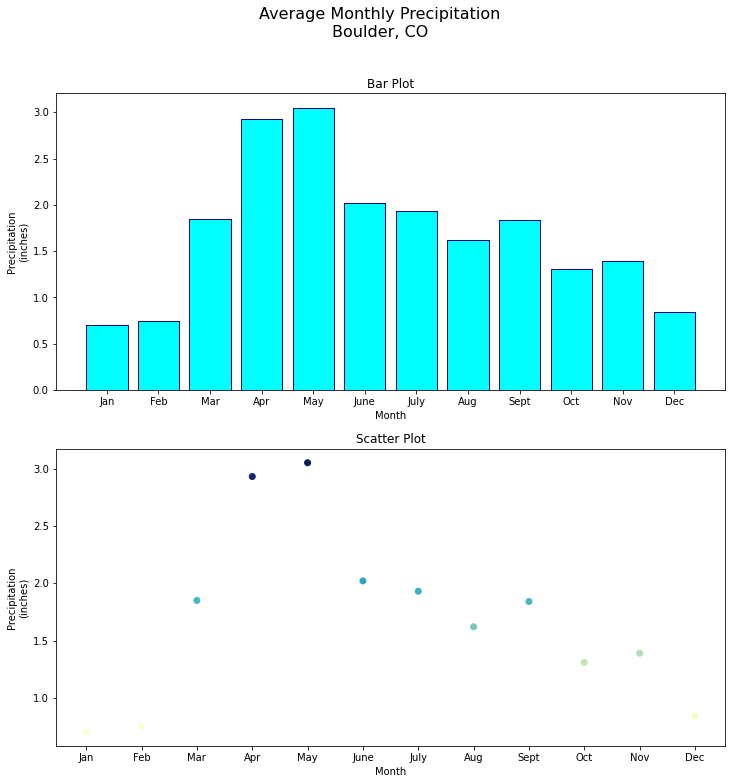

In [33]:
# Define plot space
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

fig.suptitle("Average Monthly Precipitation\nBoulder, CO", fontsize = 16)

# Define x and y axes
ax1.bar(months, 
       boulder_monthly_precip,
       color = 'cyan', 
       edgecolor = 'darkblue')

# Set plot title and axes labels
ax1.set(title = "Bar Plot",
       xlabel = "Month",
       ylabel = "Precipitation\n(inches)");

# Define x and y axes
ax2.scatter(months, 
        boulder_monthly_precip,
        c = boulder_monthly_precip,
        cmap = 'YlGnBu')

# Set plot title and axes labels
ax2.set(title = "Scatter Plot",
       xlabel = "Month",
       ylabel = "Precipitation\n(inches)")

plt.show()

In [2]:
# Import required python packages
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import earthpy as et

# Date time conversion registration
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Get the data
# data = et.data.get_data('colorado-flood', path)

# Prettier plotting with seaborn
sns.set(font_scale=1.5)
# Ticks instead of whitegrid in order to demonstrate changes to plot ticks better
sns.set_style("ticks")

In [9]:
# Set working directory
os.chdir(os.path.join("/Users/judith/Box Sync/development/courses/earth-analytics/earth-analytics-bootcamp/"))

# Read in the data
data_path = os.path.join("data", 
                         "colorado-flood",
                         "precipitation",
                         "805325-precip-dailysum-2003-2013.csv")
boulder_daily_precip = pd.read_csv(data_path,
                                   parse_dates=['DATE'],
                                   na_values=['999.99'],
                                   index_col=['DATE'])

In [10]:
# Subset the data as we did previously
precip_boulder_AugOct = boulder_daily_precip["2013-08-15":"2013-10-15"]

# View first few rows of data
precip_boulder_AugOct.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-08-21,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,233
2013-08-26,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,238
2013-08-27,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,239
2013-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,244
2013-09-09,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,252


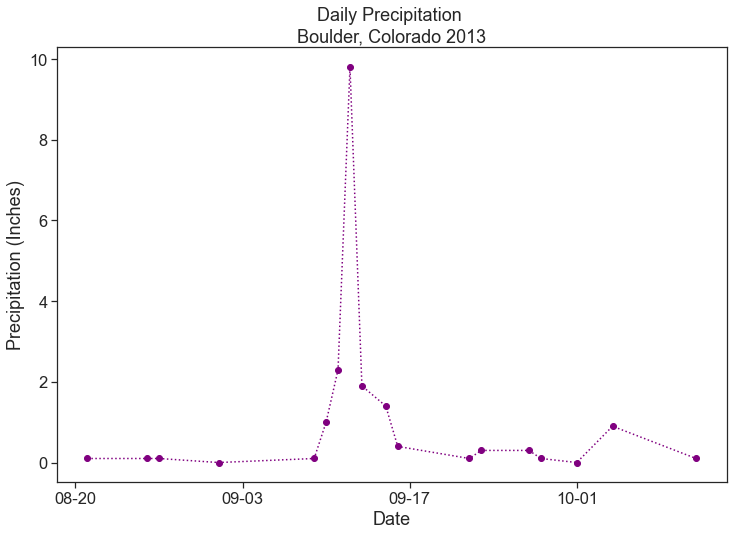

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(precip_boulder_AugOct.index.values,
        precip_boulder_AugOct['DAILY_PRECIP'].values,
        ':o',
        color = 'purple')
ax.set(xlabel = "Date", 
       ylabel = "Precipitation (Inches)",
       title = "Daily Precipitation \nBoulder, Colorado 2013")

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

plt.show()

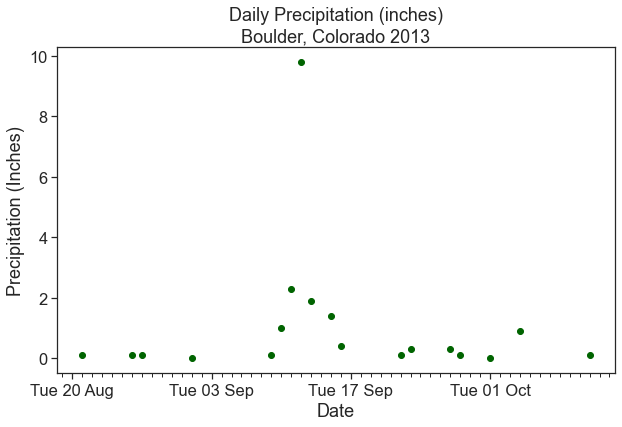

In [28]:
# Plot the data
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(precip_boulder_AugOct.index.values,
           precip_boulder_AugOct['DAILY_PRECIP'].values,
           color = 'darkgreen')
ax.set(xlabel = "Date", 
       ylabel = "Precipitation (Inches)",
       title = "Daily Precipitation (inches)\nBoulder, Colorado 2013")

# Define the date format
date_form = DateFormatter("%a %d %b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

ax.xaxis.set_minor_locator(mdates.DayLocator())
